In [ ]:
cd /content/drive/MyDrive/k3b363f3vz-2/2. Ground Truth Labels

/content/drive/MyDrive/k3b363f3vz-2/2. Ground Truth Labels


In [ ]:
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import cv2
from google.colab.patches import cv2_imshow
path = '/content/drive/MyDrive/k3b363f3vz-2/2. Ground Truth Labels'
# Store the image file names in a list as long as they are jpgs
images = [f for f in os.listdir(path) if os.path.splitext(f)[-1] == '.png']

In [ ]:
images=sorted(images)

In [ ]:
m=images[177]
print(m)

T1_0196_S8.png


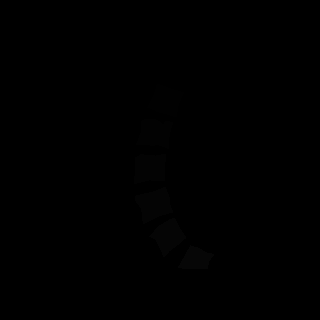

In [ ]:
img1=cv2.imread(m)
img2=cv2.imread(m)
cv2_imshow(img1)

In [ ]:
import numpy as np
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img3=np.where(gray1==5,255,0)
img3_6=np.where(gray1==5,255,0)
#gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)

In [ ]:
import numpy as np
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img3_6=np.where(gray1==6,255,0)
gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)

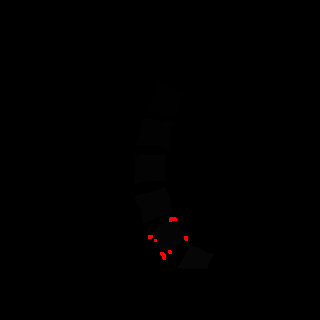

In [ ]:
import cv2
import numpy as np



gray = np.float32(img3)
dst = cv2.cornerHarris(gray,2,3,0.04)

#result is dilated for marking the corners, not important
dst = cv2.dilate(dst,None)

# Threshold for an optimal value, it may vary depending on the image.
img2[dst>0.01*dst.max()]=[0,0,255]

cv2_imshow(img2)
if cv2.waitKey(0) & 0xff == 27:
    cv2.destroyAllWindows()


In [ ]:
img1.shape

(320, 320, 3)

In [ ]:

img_hsv=cv2.cvtColor(img2, cv2.COLOR_BGR2HSV)

# lower mask (0-10)
lower_red = np.array([0,50,50])
upper_red = np.array([10,255,255])
mask0 = cv2.inRange(img_hsv, lower_red, upper_red)

# upper mask (170-180)
lower_red = np.array([170,50,50])
upper_red = np.array([180,255,255])
mask1 = cv2.inRange(img_hsv, lower_red, upper_red)

# join my masks
mask = mask0+mask1

# set my output img to zero everywhere except my mask
output_img = img2.copy()
output_img[np.where(mask==0)] = 0

# or your HSV image, which I *believe* is what you want
output_hsv = img_hsv.copy()
output_hsv[np.where(mask==0)] = 0

In [ ]:
rows,cols,n=output_img.shape
print(rows)
print(cols)
k=0
pixels=[]
for i in range(0,rows):
  for j in range(0,cols):
    for n1 in range(0,n):
      if (output_img[i,j,n1]!=0):
        pixels.append((i,j))
print(pixels)
len(pixels)

320
320
[(217, 170), (217, 171), (217, 172), (217, 173), (217, 174), (217, 175), (218, 169), (218, 170), (218, 171), (218, 172), (218, 173), (218, 174), (218, 175), (218, 176), (219, 169), (219, 170), (219, 171), (219, 172), (219, 173), (219, 174), (219, 175), (219, 176), (220, 169), (220, 170), (220, 171), (220, 172), (220, 173), (220, 174), (220, 175), (220, 176), (221, 169), (221, 170), (221, 171), (235, 148), (235, 149), (235, 150), (235, 151), (235, 152), (236, 148), (236, 149), (236, 150), (236, 151), (236, 152), (236, 184), (236, 185), (236, 186), (236, 187), (237, 148), (237, 149), (237, 150), (237, 151), (237, 152), (237, 184), (237, 185), (237, 186), (237, 187), (238, 148), (238, 149), (238, 150), (238, 151), (238, 184), (238, 185), (238, 186), (238, 187), (239, 154), (239, 155), (239, 156), (239, 184), (239, 185), (239, 186), (239, 187), (240, 154), (240, 155), (240, 156), (240, 185), (240, 186), (240, 187), (241, 154), (241, 155), (241, 156), (250, 168), (250, 169), (250, 1

129

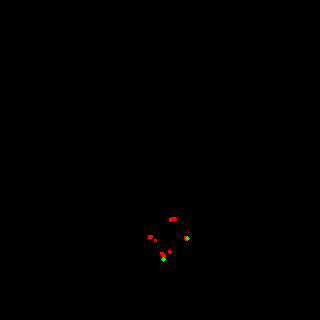

In [ ]:
px =  187 # 163
py= 238# 259 
cv2.circle(output_img,(int(px),int(py)), radius=2, color=(0, 255,0), thickness=-1)
cv2_imshow(output_img)

In [ ]:
# a = pt 1 on line 1
# b = pt 2 on line 1
# c = pt 1 on line 2
# d = pt 2 on line 2
def intersect(a,b,c,d):

    # stuff for line 1
    a1 = b[1]-a[1]
    b1 = a[0]-b[0]
    c1 = a1*a[0] + b1*a[1]

    # stuff for line 2
    a2 = d[1]-c[1]
    b2 = c[0]-d[0]
    c2 = a2*c[0] + b2*c[1]

    determinant = a1*b2 - a2*b1

    if (determinant == 0):
        # Return (infinity, infinity) if they never intersect
        # By "never intersect", I mean that the lines are parallel to each other
        return math.inf, math,inf
    else:
        x = (b2*c1 - b1*c2)/determinant
        y = (a1*c2 - a2*c1)/determinant
        return x,y

In [ ]:
def slope(x1,y1,x2,y2):
    ###finding slope
    if x2!=x1:
        return((y2-y1)/(x2-x1))
    else:
        return 'NA'

def drawLine(image,x1,y1,x2,y2):

    m=slope(x1,y1,x2,y2)
    h,w=image.shape[:2]
    if m!='NA':
        ### here we are essentially extending the line to x=0 and x=width
        ### and calculating the y associated with it
        ##starting point
        px=0
        py=-(x1-0)*m+y1
        ##ending point
        qx=w
        qy=-(x2-w)*m+y2
    else:
    ### if slope is zero, draw a line with x=x1 and y=0 and y=height
        px,py=x1,0
        qx,qy=x1,h
    cv2.line(image, (int(px), int(py)), (int(qx), int(qy)), (0, 255, 0), 1)
    cv2_imshow(image)

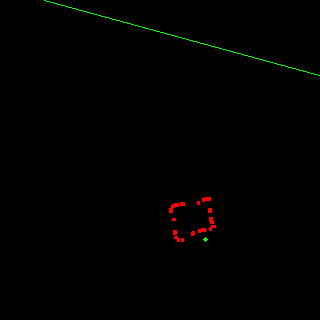

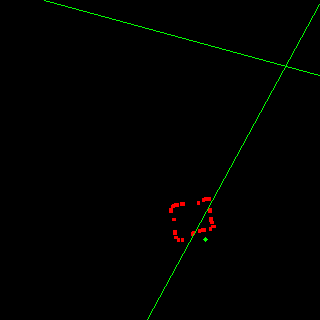

In [ ]:

drawLine(output_img, 169, 34,  205 ,44)
drawLine(output_img, 189,244, 177,266)

In [ ]:
import math
pi=3.14
m1=slope( 157, 83,  186 ,92)
print("Slope of Line 1, m1=",m1)
m2=slope( 189,244, 177,266)
print("Slope of Line 1, m2=",m2)
n=m1-m2
d=1+(m1*m2)
print("Angle",(np.arctan(n/d)) * 180 / pi  )

Slope of Line 1, m1= 0.3103448275862069
Slope of Line 1, m2= -1.8333333333333333
Angle 78.67088251768615


In [ ]:
cd /content/drive/MyDrive/k3b363f3vz-2/1. Images

/content/drive/MyDrive/k3b363f3vz-2/1. Images


In [ ]:
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import cv2
path = '/content/drive/MyDrive/k3b363f3vz-2/1. Images'
# Store the image file names in a list as long as they are jpgs
images1 = [f for f in os.listdir(path) if os.path.splitext(f)[-1] == '.png']

In [ ]:
images1=sorted(images1)
m1=images1[51]
print(m1)

T1_0057_S8.png


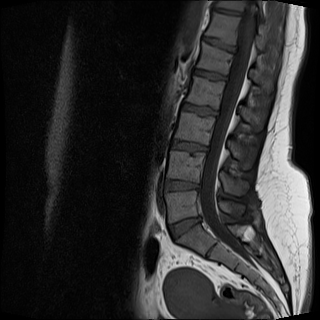

In [ ]:
im=cv2.imread(m1)
cv2_imshow(im)

In [ ]:
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import cv2
from google.colab.patches import cv2_imshow
path = '/content/drive/MyDrive/k3b363f3vz-2/2. Ground Truth Labels'
# Store the image file names in a list as long as they are jpgs
images = [f for f in os.listdir(path) if os.path.splitext(f)[-1] == '.png']

In [ ]:
images=sorted(images)
m=images[51]
print(m)

T1_0057_S8.png


In [ ]:
cd /content/drive/MyDrive/k3b363f3vz-2/2. Ground Truth Labels

/content/drive/MyDrive/k3b363f3vz-2/2. Ground Truth Labels


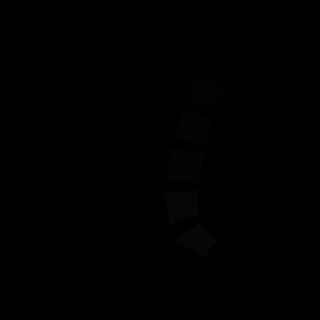

In [ ]:
img1=cv2.imread(m)
cv2_imshow(img1)

In [ ]:
import cv2
import matplotlib.pyplot as plt
from skimage import measure
import numpy as np


In [ ]:
props = measure.regionprops(img1)

In [ ]:
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)

In [ ]:
for i in props:
  print(i)

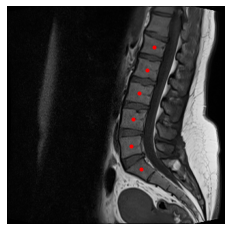

In [ ]:
fig,ax = plt.subplots(1,1)
plt.axis('off')
cent_x=[]
cent_y=[]
ax.imshow(im,cmap='gray')
centroids = np.zeros(shape=(len(np.unique(gray1)),2)) # Access the coordinates of centroids
for i,prop in enumerate(props):
    my_centroid = prop.centroid
    #centroids[i,:]= my_centroid
    cent_x.append(my_centroid[0])
    cent_y.append(my_centroid[1])
    ax.plot(my_centroid[1],my_centroid[0],'r.')

# print(centroids)
# fig.savefig('out.png', bbox_inches='tight', pad_inches=0)
plt.show()


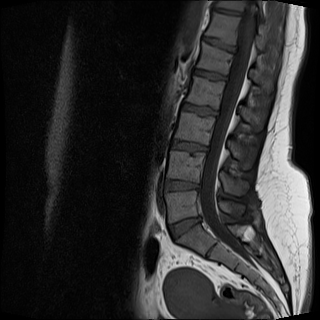

In [ ]:
cv2_imshow(im)

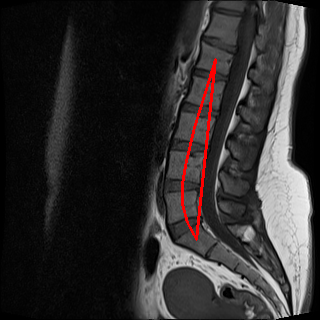

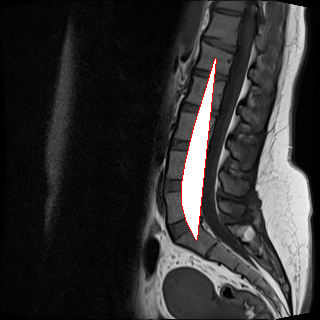

1


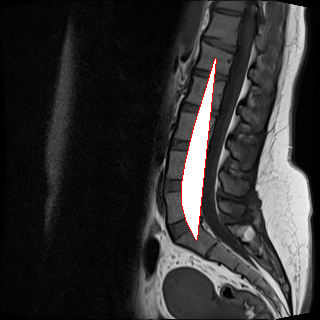

1


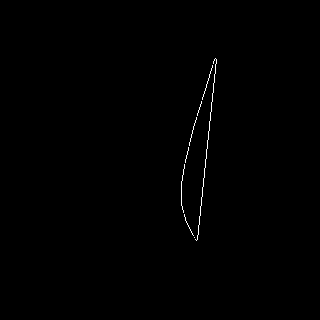

1


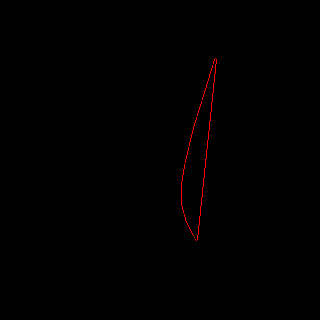

1


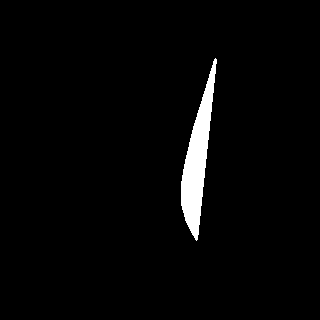

320
320
[(58, 215), (59, 214), (59, 215), (59, 216), (60, 214), (60, 215), (60, 216), (61, 213), (61, 214), (61, 215), (61, 216), (62, 213), (62, 214), (62, 215), (62, 216), (63, 213), (63, 214), (63, 215), (63, 216), (64, 213), (64, 214), (64, 215), (65, 212), (65, 213), (65, 214), (65, 215), (66, 212), (66, 213), (66, 214), (66, 215), (67, 212), (67, 213), (67, 214), (67, 215), (68, 211), (68, 212), (68, 213), (68, 214), (68, 215), (69, 211), (69, 212), (69, 213), (69, 214), (69, 215), (70, 211), (70, 212), (70, 213), (70, 214), (70, 215), (71, 210), (71, 211), (71, 212), (71, 213), (71, 214), (71, 215), (72, 210), (72, 211), (72, 212), (72, 213), (72, 214), (72, 215), (73, 210), (73, 211), (73, 212), (73, 213), (73, 214), (73, 215), (74, 209), (74, 210), (74, 211), (74, 212), (74, 213), (74, 214), (75, 209), (75, 210), (75, 211), (75, 212), (75, 213), (75, 214), (76, 209), (76, 210), (76, 211), (76, 212), (76, 213), (76, 214), (77, 209), (77, 210), (77, 211), (77, 212), (77, 213), (

In [ ]:
pts=np.array([[cent_y[0],cent_x[0]],[cent_y[1],cent_x[1]],[cent_y[2],cent_x[2]],[cent_y[3],cent_x[3]],[(((cent_y[3]+cent_y[4])/2)-1),   ((cent_x[3]+cent_x[4])/2)],
              [cent_y[4]+1, cent_x[4]],[(((cent_y[4]+cent_y[5])/2)-2),   ((cent_x[4]+cent_x[5])/2)],
              [cent_y[5], cent_x[5]]],np.int32)

isClosed = True
image=[]
# Blue color in BGR
color = (0, 0, 255)
  
# Line thickness of 2 px
thickness = 2
  
# Using cv2.polylines() method
# Draw a Blue polygon with 
# thickness of 1 px
image = cv2.polylines(im, [pts], 
                      isClosed, color, thickness, lineType=8)

cv2_imshow(image)


cv2.drawContours(image,[pts],0,(255,255,255),-1)
cv2_imshow( image)
cv2.waitKey(0)


#blurring and smoothin
img1=image

hsv = cv2.cvtColor(img1,cv2.COLOR_BGR2HSV)

#lower red
lower_red = np.array([0,50,50])
upper_red = np.array([10,255,255])


#upper red
lower_red2 = np.array([170,50,50])
upper_red2 = np.array([180,255,255])

mask = cv2.inRange(hsv, lower_red, upper_red)
res = cv2.bitwise_and(img1,img1, mask= mask)

print(1)
cv2_imshow(img1)
print(1)
cv2_imshow(mask)
print(1)
cv2_imshow(res)
print(1)
cv2.waitKey(0)
cv2.destroyAllWindows()

binary=cv2.drawContours(mask,[pts],0,(255,255,255),-1)
cv2_imshow( binary)
cv2.waitKey(0)
#cv2.imwrite('img.jpg',binary)
#cv2.destroyAllWindows()


rows,cols=binary.shape
print(rows)
print(cols)
k=0
pixels=[]
for i in range(0,rows):
  for j in range(0,cols):
    if (binary[i,j]!=0):
      pixels.append((i,j))
print(pixels)
len(pixels)

nzCount = cv2.countNonZero(binary)
print(nzCount)

from skimage.io import imread, imshow
from skimage.filters import gaussian, threshold_otsu
from skimage import measure
import matplotlib.pyplot as plt
labels = measure.label(binary)
props = measure.regionprops(labels)
for prop in props:
    print('Label: {} >> Object size: {}'.format(prop.label, prop.area))

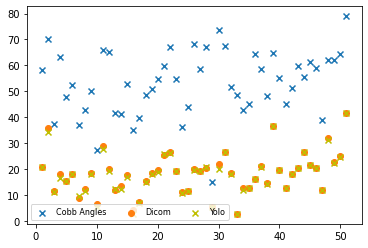

In [ ]:
import matplotlib.pyplot as plt

x = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51]
y = [58.37,70.0,37.4,63.4,47.9,52.5,36.86,42.7,50.19,27.20,65.91513663,
65.15174703,
41.65399481,
41.36181342,
52.88931703,
35.13419306,
39.73460928,
48.49463893,
50.90857851,
54.67335543,
59.8569864,
66.97662539,
54.66640248,
36.40797337,
43.85423716,
68.06151953,
58.69794704,
67.27476107,
14.99616272,
73.65919437,
67.65347936,
51.70983681,
48.57328299,
42.86504396,
44.9400672,
64.40051661,
58.45458041,
48.30357891,
64.85521437,
55.09105724,
45.29041783,
51.32161335,
59.8286402,
55.47049394,
61.14539033,
59.01957803,
39.09385889,
62.07908885,
62.02632009,
64.41636511,
78.95154981,
]

x1=[[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51]]
y1=[
20.8,
35.8,
11.7,
18.2,
15.5,
18,
9,
12.5,
18.5,
6.5,
29,
20.1,
12,
13.3,
17.6,
4.3,
7.2,
15.3,
18.5,
19.5,
25.4,
26.4,
19.4,
11.2,
11.6,
20.2,
19.4,
20.6,
5.2,
22,
26.6,
18.6,
2.7,
12.6,
12.7,
16.1,
21,
14.5,
36.5,
19.5,
12.8,
18.2,
20.6,
26.5,
21.5,
20.3,
11.9,
31.8,
22.8,
24.9,
41.5,
]

y5=[20.63622929,
34.23055335,
11.29365091,
16.46814375,
15.38771005,
18.01914799,
9.65842553,
11.69026641,
18.03898926,
5.487300116,
27.7423216,
19.34035944,
12.17659051,
12.38812522,
17.06608793,
2.851720354,
7.033469209,
15.04032201,
18.25906136,
18.88552,
25.70683479,
26.14389669,
19.09863938,
10.86900267,
11.63368222,
19.6246826,
19.24369152,
20.92503564,
5.24050521,
20.00834683,
26.44362662,
18.26228824,
2.697028391,
12.03559602,
12.66478704,
16.02617961,
20.62303447,
14.19520187,
36.58104452,
19.81192366,
12.69388014,
18.28398788,
20.53451273,
26.61774193,
21.56146954,
20.31149403,
11.9033706,
31.10470669,
22.16025693,
24.69219148,
41.53249548,
]
a=plt.scatter(x, y,marker='x')
b=plt.scatter(x1, y1,marker='o')
c=plt.scatter(x1, y5,marker='x',color='y')
plt.legend((a, b, c),  ('Cobb Angles', 'Dicom', 'Yolo'),
           scatterpoints=1,
           loc='lower left',
           ncol=3,
           fontsize=8)
plt.show()

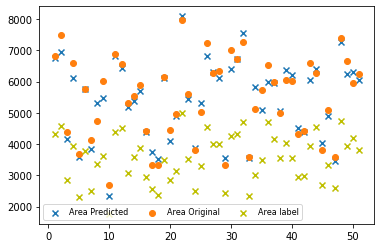

In [ ]:
y2=[6768,
6957,
4146,
6119,
3592,
5747,
3834,
5328,
5473,
2351,
6819,
6439,
5186,
5390,
5683,
4385,
3738,
3506,
6102,
4101,
4910,
8088,
5451,
3858,
5316,
6830,
6303,
6128,
3538,
6416,
6730,
7566,
3540,
5826,
5086,
5976,
5960,
5062,
6378,
6207,
4510,
4400,
6038,
6412,
4032,
4888,
3448,
7253,
6255,
6294,
6049,
]
y3=[6824,
7488,
4393,
6608,
3691,
5763,
4118,
4742,
6016,
2676,
6883,
6575,
5305,
5546,
5873,
4420,
3321,
3323,
6145,
4465,
4956,
7964,
5602,
3816,
5034,
7217,
6267,
6338,
3326,
7016,
6714,
7259,
3571,
5108,
5716,
6514,
5981,
4993,
6048,
6032,
4322,
4431,
6607,
6271,
3795,
5094,
3590,
7397,
6649,
5951,
6229,
]
y4=[4314,
4588,
2849,
3931,
2300,
3768,
2485,
3361,
3608,
1765,
4387,
4518,
3084,
3601,
3887,
2938,
2568,
2355,
3477,
2841,
3151,
4978,
3537,
2507,
3284,
4542,
3996,
4007,
2448,
4257,
4336,
4691,
2345,
3024,
3504,
4702,
4150,
3557,
4027,
3538,
2961,
2990,
3937,
4555,
2677,
3314,
2580,
4728,
3941,
4181,
3821,
]
a=plt.scatter(x, y2,marker='x')
b=plt.scatter(x,y3,marker='o')
c=plt.scatter(x,y4,marker='x',color='y')
plt.legend((a, b, c),  ('Area Predicted', 'Area Original', 'Area label'),
           scatterpoints=1,
           loc='lower left',
           ncol=3,
           fontsize=8)

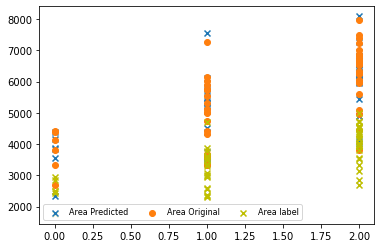

In [ ]:
c=[2,
2,
0,
2,
1,
1,
0,
1,
1,
0,
2,
2,
1,
1,
1,
0,
1,
1,
1,
2,
2,
2,
2,
0,
1,
2,
2,
2,
0,
2,
2,
1,
1,
1,
1,
2,
2,
1,
2,
2,
1,
1,
2,
2,
2,
2,
1,
2,
2,
2,
2,
]
a=plt.scatter(c, y2,marker='x')
b=plt.scatter(c,y3,marker='o')
d=plt.scatter(c,y4,marker='x',color='y')
plt.legend((a, b, d),  ('Area Predicted', 'Area Original', 'Area label'),
           scatterpoints=1,
           loc='lower left',
           ncol=3,
           fontsize=8)
